In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

ModuleNotFoundError: No module named 'cupy'

In [2]:
def loadBradyHShdf5(file,normalize='yes'):
    '''

    Parameters
    ----------
    file : str
        path to brady hotspring h5py data file
    normalize : str, optional
        "yes" or "no". Indicates whether or not to remove laser drift and 
        normalize. The default is 'yes'.

    Returns
    -------
    data : np array
        channel by samples numpy array of data
    timestamp_arr : numpy array
        array of the timestamps corresponding to the various samples in the 
        data. Timestamps for brady hotspring data are with respect to the 
        beginning time of the survey.

    '''
    
    with h5py.File(file,'r') as open_file: 
        dataset = open_file['das']
        time=open_file['t']
        data=np.array(dataset)
        timestamp_arr=np.array(time)
    data = np.transpose(data)
    if normalize=='yes':
        nSamples=np.shape(data)[1]
        # get rid of laser drift
        med = np.median(data,axis=0)
        for i in range(nSamples):
          data[:,i] = data[:,i] - med[i]
          
        max_of_rows = abs(data[:,:]).sum(axis=1)
        data = data/ max_of_rows[:, np.newaxis]
    return data, timestamp_arr


def windowed_spectra(data: np.array, subwindow_len: int,overlap,freq=None,sample_interval=1):
    """
    Calculate the frequency domain representation of data in windows.
    """

    win_start = 0
    window_samples = int(subwindow_len / sample_interval)
    total_samples = data.shape[-1]
    overlap = int(overlap/sample_interval)
    intervals = np.arange(window_samples, total_samples+1, window_samples, dtype=int) # break time series into windowed intervals

    win_end = intervals[0]

    absolute_spectra = np.fft.rfft(data[:,win_start:win_end])
    win_spectra = absolute_spectra[np.newaxis]

    while win_end < total_samples:
        win_start = win_end - overlap
        win_end = win_start + window_samples
        absolute_spectra = np.fft.rfft(data[:,win_start:win_end])
        win_spectra = np.append(
            win_spectra, absolute_spectra[np.newaxis], axis=0
        )
        # win_start = win_end
        
    
    frequencies = np.fft.rfftfreq(window_samples, sample_interval)

    return win_spectra, frequencies

In [3]:
samples_per_sec=1000
fsize=15
start_ch = 1000
nchannels = 3000

In [4]:
file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160312000018.h5"
data_noise,_= loadBradyHShdf5(file,normalize='no')

file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160312000048.h5"
data_noise2,_= loadBradyHShdf5(file,normalize='no')

data_noise = np.append(data_noise,data_noise2,axis=1)

In [5]:
win_spectra, frequencies = windowed_spectra(data_noise[start_ch:nchannels+start_ch:int(nchannels/200)], 5, 2.5, sample_interval=0.001)

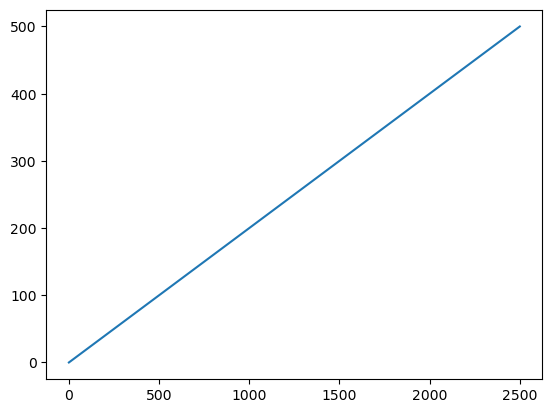

In [31]:
plt.plot(frequencies)

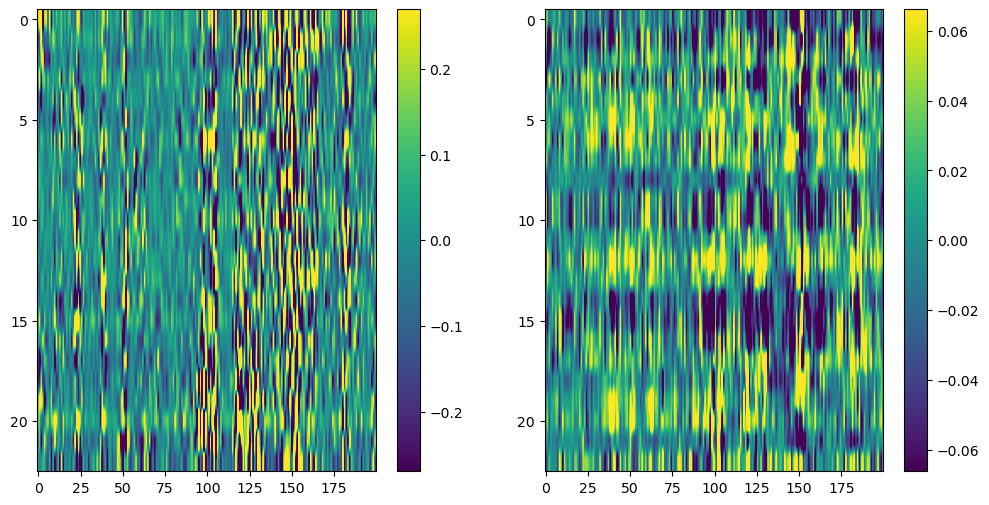

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
imshow_data = win_spectra[:,:,2].real
plt.imshow(imshow_data, vmin=-np.percentile(np.absolute(imshow_data),80), 
           vmax=np.percentile(np.absolute(imshow_data),80), aspect='auto')
plt.colorbar()
plt.subplot(1,2,2)
imshow_data = win_spectra[:,:,2].imag
plt.imshow(imshow_data, vmin=-np.percentile(np.absolute(imshow_data),80), 
           vmax=np.percentile(np.absolute(imshow_data),80), aspect='auto')
plt.colorbar()

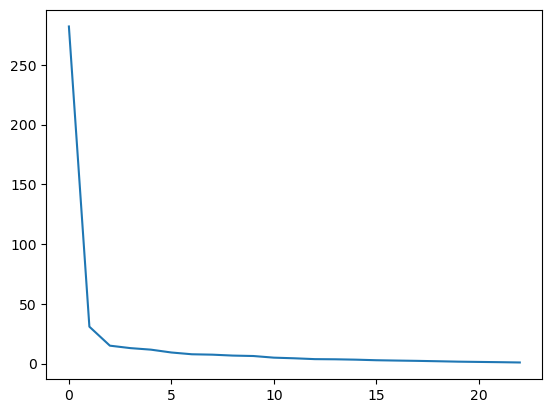

In [39]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
U, S, Vh = np.linalg.svd(win_spectra1[:,:,2].real)
plt.plot(S)
plt.subplot(1,3,2)
U, S, Vh = np.linalg.svd(win_spectra1[:,:,2].imag)
plt.plot(S)
plt.subplot(1,3,3)
U, S, Vh = np.linalg.svd(np.abs(win_spectra[:,:,2]))
plt.plot(S**2)

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
# Create two 3D arrays (example data)
num_frames = len(C) #30
data1 = cube[:]  # Replace with your 3D data array 1

# Create a function to update the animations
fig = plt.figure(figsize=(6, 6))
def update(frame):
    fig.clear()

    # Update the first animation
    ax = fig.add_subplot(111)
    ax.imshow(data1[:,:,frame], cmap=plt.cm.viridis, animated=True, extent=[0, 1,0 ,1]) #,  vmin=-np.percentile(abs(data1[frame]),90), vmax=np.percentile(abs(data1[frame]),90))
    # ax.imshow(data1[frame], cmap=plt.cm.viridis, animated=True,  vmin=-epsilon, vmax=epsilon)
    # ax.imshow(data1[frame], cmap=plt.cm.PuOr, animated=True)
    # ax.imshow(data1[frame], interpolation="bicubic", cmap=plt.cm.RdBu, animated=True)
    ax.set_title('Frequency = '+str(f[frame]), size=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.tight_layout()

# Create the animations
fig = plt.figure(figsize=(6, 6))
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)

# Display the animations side by side
display(HTML(ani.to_jshtml()))


In [40]:
file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083848.h5"
data,_ = loadBradyHShdf5(file,normalize='no')

file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083918.h5"
data2,_= loadBradyHShdf5(file,normalize='no')

# signalToUse=np.append(data[:,24976:],data2[:,:10000],axis=1)
data = np.append(data,data,axis=1)

In [41]:
win_spectra1, frequencies = windowed_spectra(data[start_ch:nchannels+start_ch:int(nchannels/200)], 5, 2.5, sample_interval=0.001)

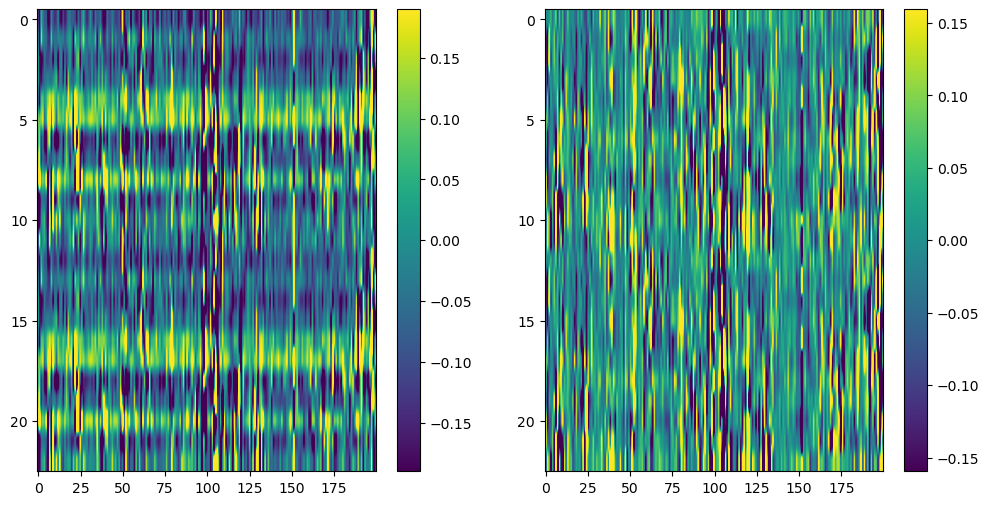

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
imshow_data = win_spectra1[:,:,2].real
plt.imshow(imshow_data, vmin=-np.percentile(np.absolute(imshow_data),80), 
           vmax=np.percentile(np.absolute(imshow_data),80), aspect='auto')
plt.colorbar()
plt.subplot(1,2,2)
imshow_data = win_spectra1[:,:,2].imag
plt.imshow(imshow_data, vmin=-np.percentile(np.absolute(imshow_data),80), 
           vmax=np.percentile(np.absolute(imshow_data),80), aspect='auto')
plt.colorbar()

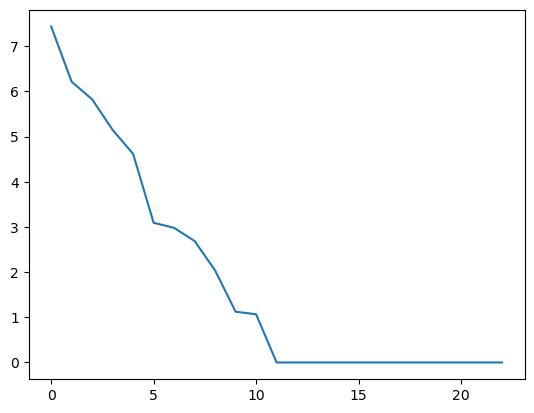

In [46]:
# U, S, Vh = np.linalg.svd(np.abs(win_spectra1[:,:,2]))
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
U, S, Vh = np.linalg.svd(win_spectra1[:,:,2].real)
plt.plot(S)
plt.subplot(1,2,2)
U, S, Vh = np.linalg.svd(win_spectra1[:,:,2].imag)
plt.plot(S)